In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2


In [13]:
mlodisdb = pd.read_excel('mlodisdb_relations_all.xlsx')

In [14]:
print(mlodisdb.info())
print(mlodisdb.isnull().sum())
mlodisdb = mlodisdb.drop(columns=['Unnamed: 31','Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34'])
mlodisdb = mlodisdb.rename(columns={'Entry':'uniprot'})
mlodisdb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mdid               771 non-null    object 
 1   pmid               771 non-null    object 
 2   level              771 non-null    object 
 3   evidence           771 non-null    object 
 4   organism           771 non-null    object 
 5   cellline_tissue    771 non-null    object 
 6   mlo                771 non-null    object 
 7   mlo_change         771 non-null    object 
 8   size               771 non-null    object 
 9   number             771 non-null    object 
 10  assembly           771 non-null    object 
 11  dynamic            771 non-null    object 
 12  others             771 non-null    object 
 13  disease_type       771 non-null    object 
 14  system             771 non-null    object 
 15  disease            771 non-null    object 
 16  mesh               771 non

,mdid,pmid,level,evidence,organism,cellline_tissue,mlo,mlo_change,size,number,...,factor,gene_id,uniprot,expression,expression_impact,mutation,mutation_impact,ptm,ptm_impact,publication_note
0,MD1,32203489,LLPS,Indirect experiment,Homo sapiens,"C33A,LO2,HeLa",Phase separation,-,-,-,...,BRD4,23476,O60885,-,-,C-terminal deletion isoform,the short isoform (BRD4S) lacks this C-termina...,Ser;phosphorylation;CK2,BRD4S phosphorylation diminishes BRD4 condensa...,"BRD4S knockdown reduces BRD4S condensation,and..."
1,MD2,31043593,LLPS,Indirect experiment,Homo sapiens,HeLa,Phase separation,-,-,-,...,HNRNPA1,3178,P09651,-,-,"p.Asp214Val,p.Asp214Asn",Asp mutations found in familial ALS enhance th...,N-terminal;acetylation;_,N-terminally acetylated hnRAC1 formed reversib...,"Here,we observe a reversible amyloid formation..."
2,MD3,31043593,MLO-unchanged,Indirect experiment,Homo sapiens,HeLa,Stress granule,-,-,-,...,HNRNPA1,3178,P09651,-,-,p.Asp214Val,The atomic structures of hnRACs reveal a disti...,N-terminal;acetylation;_,The N-terminal acetylation showed no influence...,"Here,we observe a reversible amyloid formation..."
3,MD4,"32209327,28513807",MLO-unchanged,Indirect experiment,"Homo sapiens,Mus musculus","H9c2,HL-0",Nuclear pore complex,-,-,-,...,NUP153,9972,P49790,up,Nup153 up-regulation and increased acetylation...,-,-,Lys;acetylation;_,lysine acetyl transferase (KAT) activity assoc...,Beyond the control of nuclear-cytoplasmic traf...
4,MD5,"32209327,28513807",MLO-unchanged,Indirect experiment,"Homo sapiens,Mus musculus","H9c2,HL-1",Nuclear pore complex,-,-,-,...,NUP153,9972,P49790,up,Nup153 up-regulation and increased acetylation...,-,-,Lys;acetylation;_,lysine acetyl transferase (KAT) activity assoc...,Beyond the control of nuclear-cytoplasmic traf...


In [25]:
# OJO, algunas entradas a pesar de ser proteinas humanas estan anotadas como otros organismos, eso es por el experimento del que provienen. Por ejemplo, O14980 (Exportin-1 human) esta anotada como Rattus norvegicus porque se usaron celulas madres mesenquimales transformadas de Rata.
mlodisdb.organism.value_counts()

Homo sapiens                                         495
Mus musculus                                          83
Homo sapiens,Mus musculus                             70
Rattus norvegicus                                     22
Mus musculus,Homo sapiens                             19
Drosophila melanogaster                               12
Escherichia coli                                       8
Homo sapiens,Rattus norvegicus                         6
Homo sapiens,Escherichia coli                          5
Homo sapiens,Danio rerio,Xenopus                       4
Homo sapiens,Caenorhabditis elegans                    3
Homo sapiens,Chlorocebus sabaeus                       3
Rattus norvegicus,Homo sapiens                         3
Homo sapiens，Mus musculus                              3
C. albicans                                            2
Drosophila melanogaster,Homo sapiens                   2
Homo sapiens,Drosophila                                2
C. elegans                     

In [15]:
#Box1 database
box = pd.read_csv('box1.csv')
box = box.drop(columns='mim')
box.head()

,uniprot,organism,mlo,hgnc_id
0,O15527,Homo sapiens,nuclear speckle,HGNC:8125
1,O43663,Homo sapiens,pcg body,HGNC:9341
2,O75494,Homo sapiens,nuclear speckle,HGNC:16713
3,O95613,Homo sapiens,centrosome/spindle pole body,HGNC:16068
4,P08047,Homo sapiens,centrosome/spindle pole body,HGNC:11205


In [18]:
box_disdb = box.merge(mlodisdb, on='uniprot')


In [24]:
mlodisdb[mlodisdb.uniprot.isin(box.uniprot)] # dan lo mismo, 298 proteinas en mlosdisdb

,mdid,pmid,level,evidence,organism,cellline_tissue,mlo,mlo_change,size,number,...,factor,gene_id,uniprot,expression,expression_impact,mutation,mutation_impact,ptm,ptm_impact,publication_note
0,MD1,32203489,LLPS,Indirect experiment,Homo sapiens,"C33A,LO2,HeLa",Phase separation,-,-,-,...,BRD4,23476,O60885,-,-,C-terminal deletion isoform,the short isoform (BRD4S) lacks this C-termina...,Ser;phosphorylation;CK2,BRD4S phosphorylation diminishes BRD4 condensa...,"BRD4S knockdown reduces BRD4S condensation,and..."
1,MD2,31043593,LLPS,Indirect experiment,Homo sapiens,HeLa,Phase separation,-,-,-,...,HNRNPA1,3178,P09651,-,-,"p.Asp214Val,p.Asp214Asn",Asp mutations found in familial ALS enhance th...,N-terminal;acetylation;_,N-terminally acetylated hnRAC1 formed reversib...,"Here,we observe a reversible amyloid formation..."
2,MD3,31043593,MLO-unchanged,Indirect experiment,Homo sapiens,HeLa,Stress granule,-,-,-,...,HNRNPA1,3178,P09651,-,-,p.Asp214Val,The atomic structures of hnRACs reveal a disti...,N-terminal;acetylation;_,The N-terminal acetylation showed no influence...,"Here,we observe a reversible amyloid formation..."
3,MD4,"32209327,28513807",MLO-unchanged,Indirect experiment,"Homo sapiens,Mus musculus","H9c2,HL-0",Nuclear pore complex,-,-,-,...,NUP153,9972,P49790,up,Nup153 up-regulation and increased acetylation...,-,-,Lys;acetylation;_,lysine acetyl transferase (KAT) activity assoc...,Beyond the control of nuclear-cytoplasmic traf...
4,MD5,"32209327,28513807",MLO-unchanged,Indirect experiment,"Homo sapiens,Mus musculus","H9c2,HL-1",Nuclear pore complex,-,-,-,...,NUP153,9972,P49790,up,Nup153 up-regulation and increased acetylation...,-,-,Lys;acetylation;_,lysine acetyl transferase (KAT) activity assoc...,Beyond the control of nuclear-cytoplasmic traf...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,MD759,"29867335,27768896",LLPS,Indirect experiment,Homo sapiens,"HEK 293T,HeLa",Phase separation,-,-,-,...,C9orf72,203228,Q96LT7,-,-,-,-,-,-,Expansion of a hexanucleotide repeat GGGGCC (G...
762,MD763,30401430,LLPS,Indirect experiment,Homo sapiens,"COS-7,CV1,human brain tissue",Phase separation,-,-,-,...,PrPC,5621,P04156,-,-,-,-,-,-,Prion protein (PrPC) separates as a liquid pha...
763,MD764,"30890779,28683104",LLPS,Indirect experiment,Homo sapiens,"HEK 293T,hiPSC-derived neurons",Phase separation,-,-,-,...,TAU,4137,P10636,-,-,-,-,-,-,"Tau protein,the primary constituent of Alzheim..."
764,MD765,32003979,LLPS,Indirect experiment,Escherichia coli,E. coli Rosetta (DE3),Phase separation,-,-,-,...,TDP-43,23435,Q13148,-,-,-,-,-,-,Thioredoxin (Trx)-fused TDP-43 (311-360) can u...


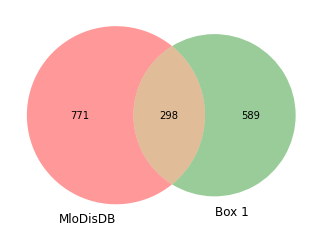

In [35]:
venn2(subsets = (len(mlodisdb.uniprot), len(box.uniprot), len(box_disdb.uniprot)), set_labels = ('MloDisDB', 'Box 1'))

In [126]:
complete = mlodisdb.mlo.value_counts()
box1 = box_disdb.mlo_y.value_counts()
bar_h = pd.DataFrame({'complete': complete, 'box1': box1})
bar_h = bar_h.sort_values('complete')

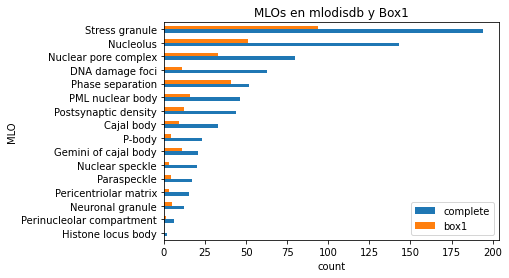

In [127]:
bar_h.plot.barh()
plt.title('MLOs en mlodisdb y Box1')
plt.ylabel('MLO')
plt.xlabel('count')
plt.show()

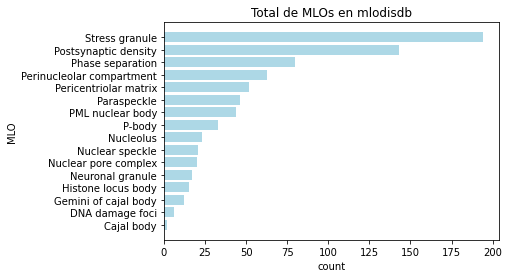

In [76]:
plt.barh(sorted(mlodisdb.mlo.value_counts().index) , width=sorted(mlodisdb.mlo.value_counts()), color='lightblue')
plt.title('Total de MLOs en mlodisdb')
plt.ylabel('MLO')
plt.xlabel('count')
plt.show()


In [110]:
mlodisdb.evidence.value_counts()

Indirect experiment       463
Direct experiment         177
Clinical investigation    131
Name: evidence, dtype: int64

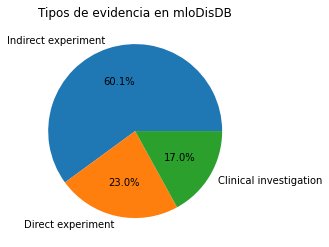

In [115]:
plt.pie(mlodisdb.evidence.value_counts(), labels=mlodisdb.evidence.value_counts().index, autopct= '%1.1f%%')
plt.title('Tipos de evidencia en mloDisDB')
plt.show()

In [119]:
mlodisdb.disease_type.value_counts()

nervous system disease    325
cancer                    250
other diseases            136
biological process         60
Name: disease_type, dtype: int64

In [120]:
box_disdb.disease_type.value_counts()

nervous system disease    165
cancer                     67
other diseases             48
biological process         18
Name: disease_type, dtype: int64

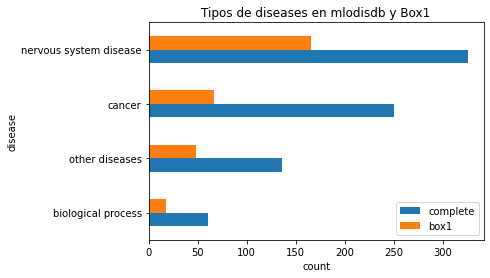

In [128]:
pd.DataFrame({'complete': mlodisdb.disease_type.value_counts(), 'box1': box_disdb.disease_type.value_counts()}).sort_values('complete', ascending=True).plot.barh()
plt.title('Tipos de diseases en mlodisdb y Box1')
plt.ylabel('disease')
plt.xlabel('count')
plt.show()